In [24]:
# Module Imports
from __future__ import print_function
import random
from os import listdir
import glob
import pandas as pd

import numpy as np
from scipy import misc
import tensorflow as tf
import h5py

from keras.utils import np_utils

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Input,BatchNormalization
from keras.utils.vis_utils import plot_model

from tensorflow.keras.utils import to_categorical


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Setting the random seed so that the results are reproducible. 
random.seed(42)

## **1. Import the data.**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the Dataset as .h5 file**

In [5]:
hf = h5py.File('/content/drive/MyDrive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [6]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [7]:
train_dataset=hf.get('X_train')

# Convert Train Dataset to numpy Array
train_arr = np.array(train_dataset)


test_dataset=hf.get('X_test')

# Convert Test Dataset to numpy Array
test_arr = np.array(test_dataset)

valid_dataset=hf.get('X_val')

# Convert Validation Dataset to numpy Array

validation_arr = np.array(valid_dataset)

train_labels=hf.get('y_train')
train_labels_arr = np.array(train_labels)

test_labels=hf.get('y_test')
test_labels_arr = np.array(test_labels)

valid_labels=hf.get('y_val')
validation_labels_arr = np.array(valid_labels)

In [67]:
print('Training set', train_arr.shape, train_labels_arr.shape)
print('Validation set', validation_arr.shape, validation_labels_arr.shape)
print('Test set', test_arr.shape, test_labels_arr.shape)

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


# Observation:
1 - On intial load of SVHN.h5 file we have observed there are 3 datasets and 3 target labels.

2 - We have convert the datasets to nd array for further processing of the image.

3 - Training Dataset has 42000 instances with 32 pixel rows and 32 pixel columns.

4 - Validation set has 60000 instances with 32 pixel rows and 32 pixel columns.

5 - Test set has 18000 insatnces with 32 pixel rows and 32 pixel columns. 

## 2. Data pre-processing and visualisation.

Label: 7


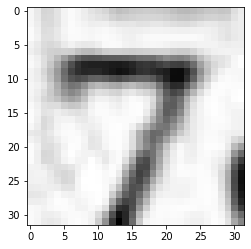

In [8]:
plt.figure()

print("Label: {}".format(train_labels_arr[8000]))
plt.imshow(train_arr[8000], cmap='gray')

# Observations:
  1 - Above shown one of the image label, We can see the image label as 7 and the same has been shown as the image.

In [9]:
def prep_data_keras(img_data):
    
    # Reshaping data for keras, with tensorflow as backend
    img_data = img_data.reshape(len(img_data), 32, 32, 1)
    
    # Converting everything to floats
    img_data = img_data.astype('float32')
    
    # Normalizing values between 0 and 1
    img_data /= 255
    
    return img_data

In [10]:
train_images = prep_data_keras(train_arr)
test_images = prep_data_keras(test_arr)
valid_images = prep_data_keras(validation_arr)

In [11]:
print(np.shape(train_images))
print(np.shape(test_images))
print(np.shape(valid_images))

(42000, 32, 32, 1)
(18000, 32, 32, 1)
(60000, 32, 32, 1)


In [12]:
print("Max value in X_train:", train_images.max())
print("Min value in X_train:", train_images.min())

Max value in X_train: 0.9999
Min value in X_train: 0.0


In [13]:
# One Hot Encoding

train_labels_arr = to_categorical(train_labels_arr, num_classes=10)
test_labels_arr = to_categorical(test_labels_arr, num_classes=10)
validation_labels_arr = to_categorical(validation_labels_arr, num_classes=10)


print("Shape of train_labels:", np.shape(train_labels_arr))


Shape of train_labels: (42000, 10)


In [14]:
print("One of the value of train_labels:", train_labels_arr[0])

One of the value of train_labels: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print("Shape of test_labels:", np.shape(test_labels_arr))
print("Shape of validation_labels:", np.shape(validation_labels_arr))

Shape of test_labels: (18000, 10)
Shape of validation_labels: (60000, 10)


#3. Design, train, tune and test a neural network image classifier.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense,Dropout,Input,BatchNormalization

In [19]:
model = Sequential()
model.add(Flatten())
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))

model.add(Dense(10, activation="softmax"))

In [21]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
# Fit the model
history = model.fit(x=train_images, y=train_labels_arr,batch_size=32,epochs=200,verbose=1,validation_data=(valid_images, validation_labels_arr),callbacks=callback)

Epoch 1/200
1313/1313 [==============================] - 8s 5ms/step - loss: 1.9655 - accuracy: 0.3110 - val_loss: 1.3557 - val_accuracy: 0.5748
Epoch 2/200
1313/1313 [==============================] - 6s 5ms/step - loss: 1.2380 - accuracy: 0.6045 - val_loss: 1.0141 - val_accuracy: 0.6828
Epoch 3/200
1313/1313 [==============================] - 6s 5ms/step - loss: 1.0163 - accuracy: 0.6813 - val_loss: 0.8539 - val_accuracy: 0.7384
Epoch 4/200
1313/1313 [==============================] - 6s 5ms/step - loss: 0.9107 - accuracy: 0.7170 - val_loss: 0.7639 - val_accuracy: 0.7715
Epoch 5/200
1313/1313 [==============================] - 7s 5ms/step - loss: 0.8377 - accuracy: 0.7400 - val_loss: 0.8324 - val_accuracy: 0.7504
Epoch 6/200
1313/1313 [==============================] - 7s 5ms/step - loss: 0.7841 - accuracy: 0.7526 - val_loss: 0.7020 - val_accuracy: 0.7875
Epoch 7/200
1313/1313 [==============================] - 6s 5ms/step - loss: 0.7426 - accuracy: 0.7689 - val_loss: 0.7052 - val_ac

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [26]:
predictions = model.predict(test_images)

In [45]:
model.evaluate(test_images,test_labels_arr,batch_size=64)

282/282 [==============================] - 1s 2ms/step - loss: 0.5645 - accuracy: 0.8622


[0.564511239528656, 0.8622221946716309]

In [27]:
np.shape(test_images)

(18000, 32, 32, 1)

In [28]:
np.shape(predictions)

(18000, 10)

In [52]:
print(predictions[6])
print(np.argmax(predictions[6]))

[3.2038097e-05 9.8431361e-01 2.9796879e-03 3.3220329e-04 1.2074608e-02
 2.2711167e-04 4.7523654e-06 1.7709526e-05 1.6375978e-05 1.7656884e-06]
1


Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


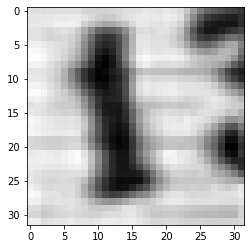

In [53]:
#Below image is also 1 and the prediction is also showing 1

plt.figure()

print("Label: {}".format(test_labels_arr[6]))
plt.imshow(test_arr[6], cmap='gray')

In [51]:
print(predictions[55])
print(np.argmax(predictions[55]))

[6.7890474e-13 2.1270911e-10 2.8354792e-12 1.1153290e-08 2.5673082e-14
 5.8974992e-11 2.0930167e-07 1.0258554e-13 9.9999976e-01 4.6330317e-13]
8


Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


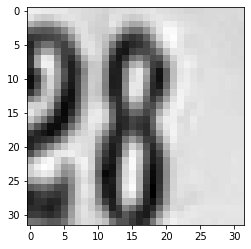

In [50]:
#Below image is also 8 and the prediction is also showing 8

plt.figure()

print("Label: {}".format(test_labels_arr[55]))
plt.imshow(test_arr[55], cmap='gray')

In [33]:
print(predictions[50])
print(np.argmax(predictions[50]))

[1.0600039e-05 4.1506305e-06 8.2749848e-06 4.5097466e-05 4.5017091e-06
 9.7901249e-01 2.0521000e-02 9.5017363e-05 2.0488998e-04 9.3852090e-05]
5


Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


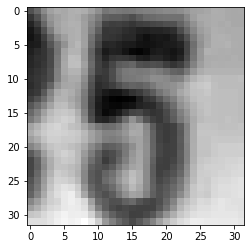

In [34]:
#Below image is also 5 and the prediction is also showing 5
plt.figure()

print("Label: {}".format(test_labels_arr[50]))
plt.imshow(test_arr[50], cmap='gray')

# Observations:
 
 1 - Training loss: 0.2848 - accuracy: 0.9050

 2 - val_loss: 0.2628 - val_accuracy: 0.9302

 3 - Test loss: 0.5645 - accuracy: 0.8622

 4 - Total params: 146,330 ,Trainable params: 144,282 ,Non-trainable params: 2,048

## Model Tuning and Hyper Parameter Tuning

In [35]:
model_leaky =Sequential()
model_leaky.add(Flatten())

model_leaky.add(tf.keras.layers.BatchNormalization())

model_leaky.add(Dense(128))
model_leaky.add(tf.keras.layers.LeakyReLU(alpha=0.3))

model_leaky.add(Dropout(0.15))

model_leaky.add(Dense(64))
model_leaky.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model_leaky.add(Dropout(0.10))

model_leaky.add(Dense(32))
model_leaky.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model_leaky.add(Dropout(0.05))

model_leaky.add(Dense(16))
model_leaky.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model_leaky.add(Dropout(0.05))

model_leaky.add(Dense(10,activation='softmax'))

In [36]:
# Compile the model
model_leaky.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ["accuracy"])

In [37]:
callback_1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
# Fit the model
history_1 = model_leaky.fit(x=train_images, y=train_labels_arr,batch_size=32,epochs=200,verbose=1,validation_data=(valid_images, validation_labels_arr),callbacks=callback_1)

Epoch 1/200
1313/1313 [==============================] - 8s 6ms/step - loss: 1.7534 - accuracy: 0.3955 - val_loss: 1.1647 - val_accuracy: 0.6422
Epoch 2/200
1313/1313 [==============================] - 7s 6ms/step - loss: 1.3333 - accuracy: 0.5727 - val_loss: 0.9807 - val_accuracy: 0.7049
Epoch 3/200
1313/1313 [==============================] - 7s 5ms/step - loss: 1.2040 - accuracy: 0.6154 - val_loss: 0.8695 - val_accuracy: 0.7449
Epoch 4/200
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1260 - accuracy: 0.6441 - val_loss: 0.8414 - val_accuracy: 0.7463
Epoch 5/200
1313/1313 [==============================] - 7s 5ms/step - loss: 1.0655 - accuracy: 0.6625 - val_loss: 0.7604 - val_accuracy: 0.7699
Epoch 6/200
1313/1313 [==============================] - 7s 5ms/step - loss: 1.0204 - accuracy: 0.6786 - val_loss: 0.7178 - val_accuracy: 0.7869
Epoch 7/200
1313/1313 [==============================] - 7s 6ms/step - loss: 0.9911 - accuracy: 0.6869 - val_loss: 0.7064 - val_ac

In [38]:
model_leaky.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               131200    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64)               

In [39]:
predictions_1 = model_leaky.predict(test_images)

In [46]:
model_leaky.evaluate(test_images,test_labels_arr,batch_size=64)

282/282 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.8532


[0.4991031885147095, 0.8531666398048401]

In [40]:
print(predictions[41])
print(np.argmax(predictions[41]))

[5.4266135e-08 2.7445995e-07 6.0258781e-06 5.4843742e-08 9.9999130e-01
 4.3947228e-08 8.7132651e-07 2.9825631e-09 1.2588373e-07 1.3175610e-06]
4


Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


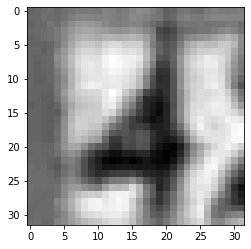

In [41]:
plt.figure()

print("Label: {}".format(test_labels_arr[41]))
plt.imshow(test_arr[41], cmap='gray')

In [42]:
print(predictions[31])
print(np.argmax(predictions[31]))

[8.5289861e-07 1.6242655e-07 2.5966024e-08 6.8188538e-06 9.9890896e-09
 1.4063028e-07 5.3008282e-08 2.6652063e-11 9.9999189e-01 3.3590146e-09]
8


Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


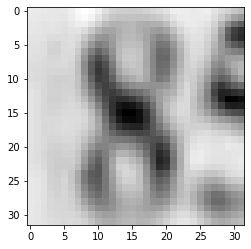

In [43]:
plt.figure()

print("Label: {}".format(test_labels_arr[31]))
plt.imshow(test_arr[31], cmap='gray')

# Observations:
  1 - The models accuracy is high when the optimizer is sgd.

  2 - Accuracy for SGD is 90% and for ADAM it is 77%

  3 - Predicting the digits using DNN classifier for more than 3 digits is not good. We are getting the prediction for any one of the digit in the SVHN.

  4 - Validation accuracy for sgd optimizer is higher than the ADAM optimizer.

  5 -Training loss is minimal for sgd optimizer than the ADAM optimizer.

# 4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

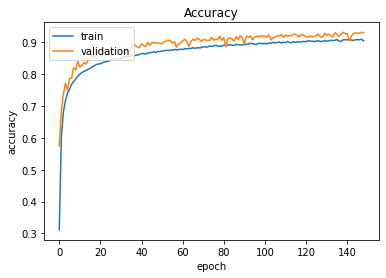

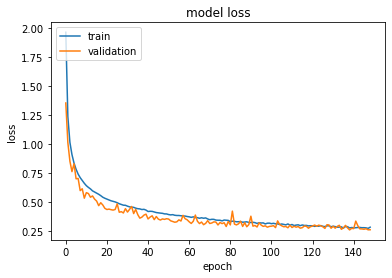

In [47]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

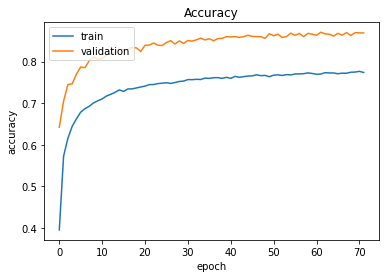

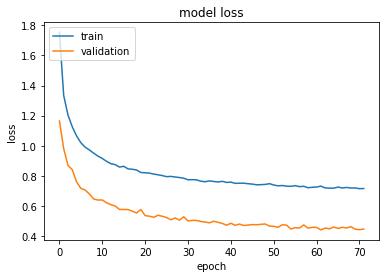

In [48]:
plt.plot(history_1.history['accuracy'])  
plt.plot(history_1.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(history_1.history['loss'])  
plt.plot(history_1.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# Observations:
  1 - From the above plot for sgd optimizer model, validation accuracy is slightly more than the training accuracy.

  2 - When the epochs increases the training and validation loss gets reduced.

  3 - Model with sgd optimizer tends to be a good model.

  4 - On comparing the plot for Adam Optimizer there is a huge gap between training and validation accuracy, which makes the model with Adam Optimizier to be slightly  underfit.
  
  5 -Training and validation loss is minimal for sgd optimizer than the ADAM optimizer when the epochs increases.